# Predicting Spotify Song Popularity

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from problem import get_train_data, get_test_data

In [2]:
pd.set_option("display.max_columns", 30)

In [14]:
X_train = pd.read_csv("data/X_train.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)
X_test = pd.read_csv("data/X_test.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)

In [15]:
numeric_features = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

categorical_features = ["playlist_genre", "playlist_subgenre", "mode"]

# Data exploration 

In [16]:
X_train.shape

(23639, 22)

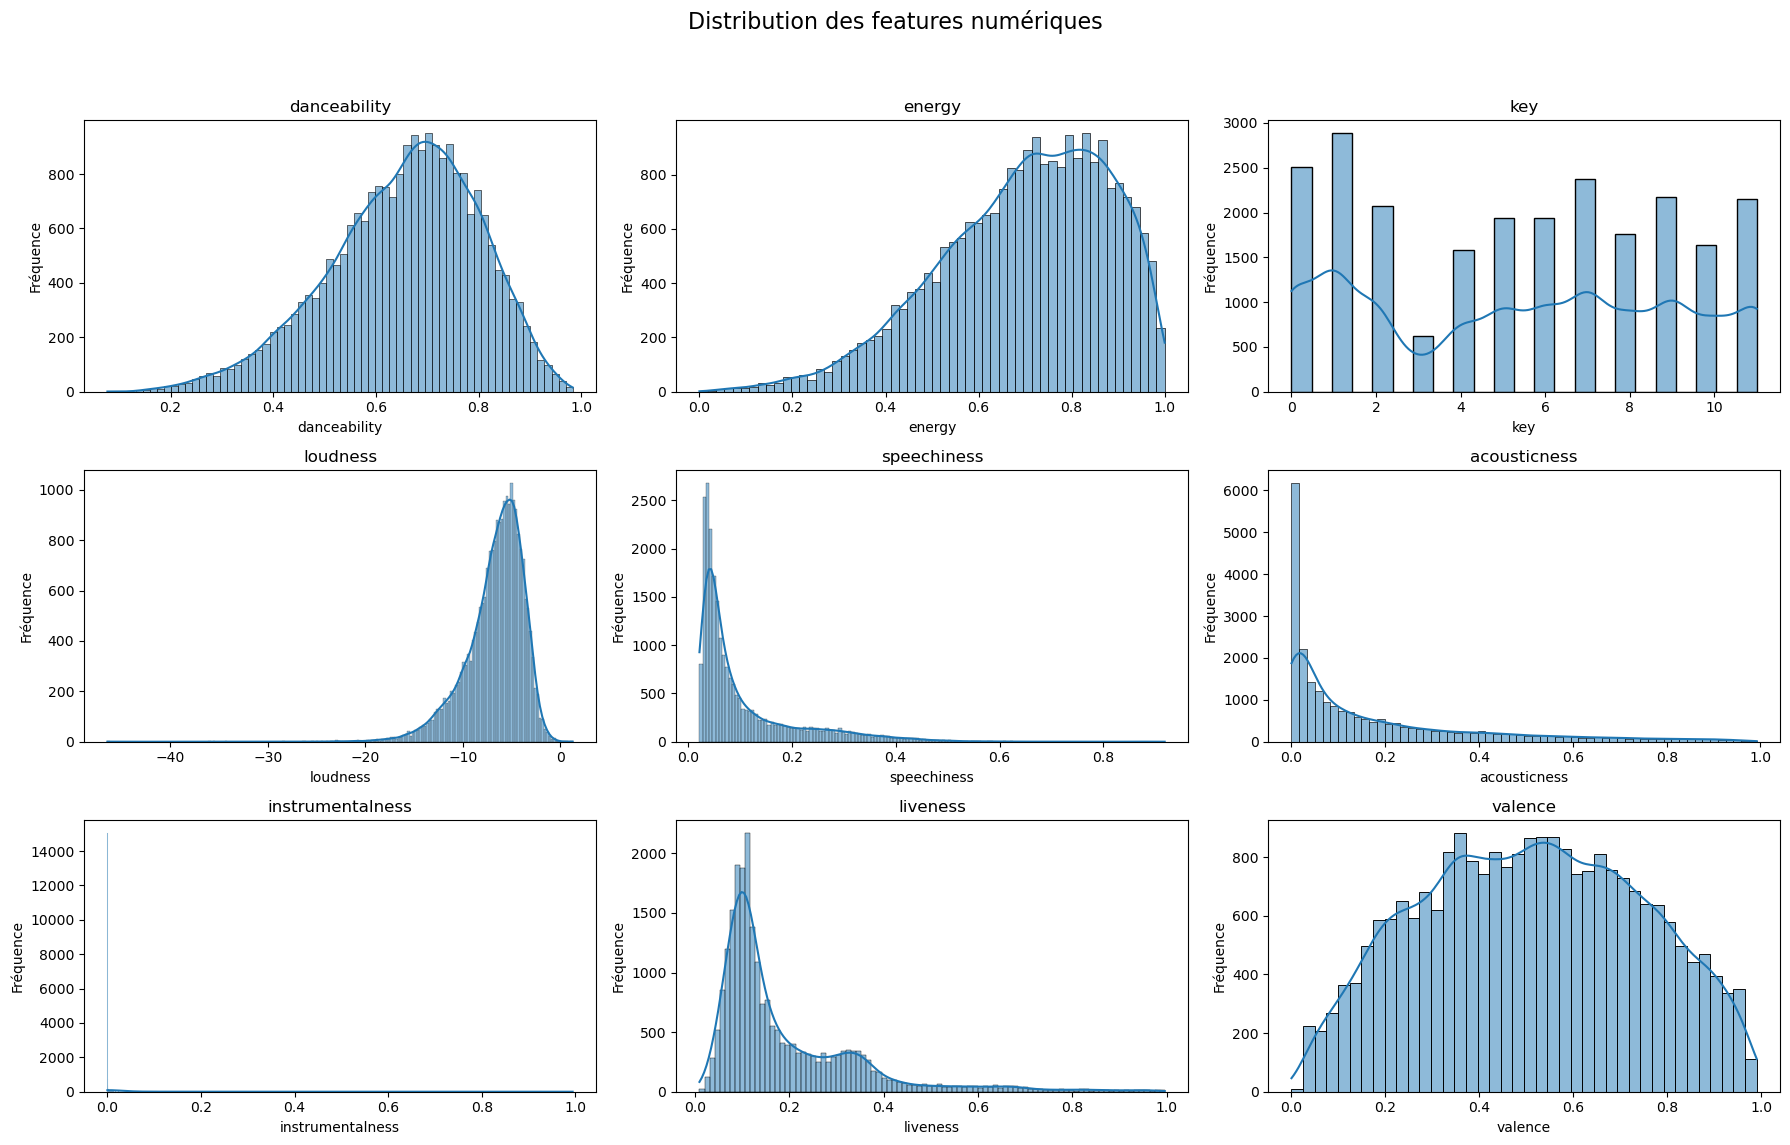

In [6]:
# Création d'une grille de subplots pour les features numériques
fig, axes = plt.subplots(len(numeric_features) // 3, 3, figsize=(18, 12))
fig.suptitle("Distribution des features numériques", fontsize=16)

for ax, feature in zip(axes.flatten(), numeric_features):
    sns.histplot(X_train[feature], kde=True, ax=ax)
    ax.set_title(feature)
    ax.set_ylabel("Fréquence")

plt.tight_layout(
    rect=[0, 0.03, 1, 0.95]
)  # Ajuste le layout pour le titre principal

plt.show()

In [17]:
print(X_train.describe())  # Statistical summary for numerical features

       danceability        energy           key      loudness          mode  \
count  23639.000000  23639.000000  23639.000000  23639.000000  23639.000000   
mean       0.653895      0.698787      5.365752     -6.718641      0.565887   
std        0.145663      0.181464      3.613953      2.978725      0.495650   
min        0.077100      0.000175      0.000000    -46.448000      0.000000   
25%        0.562000      0.581000      2.000000     -8.189500      0.000000   
50%        0.670000      0.722000      6.000000     -6.174000      1.000000   
75%        0.760000      0.841000      9.000000     -4.646000      1.000000   
max        0.983000      1.000000     11.000000      1.275000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  23639.000000  23639.000000      23639.000000  23639.000000   
mean       0.106417      0.175867          0.085507      0.190080   
std        0.101116      0.220216          0.225233      0.154489   
min        0

c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


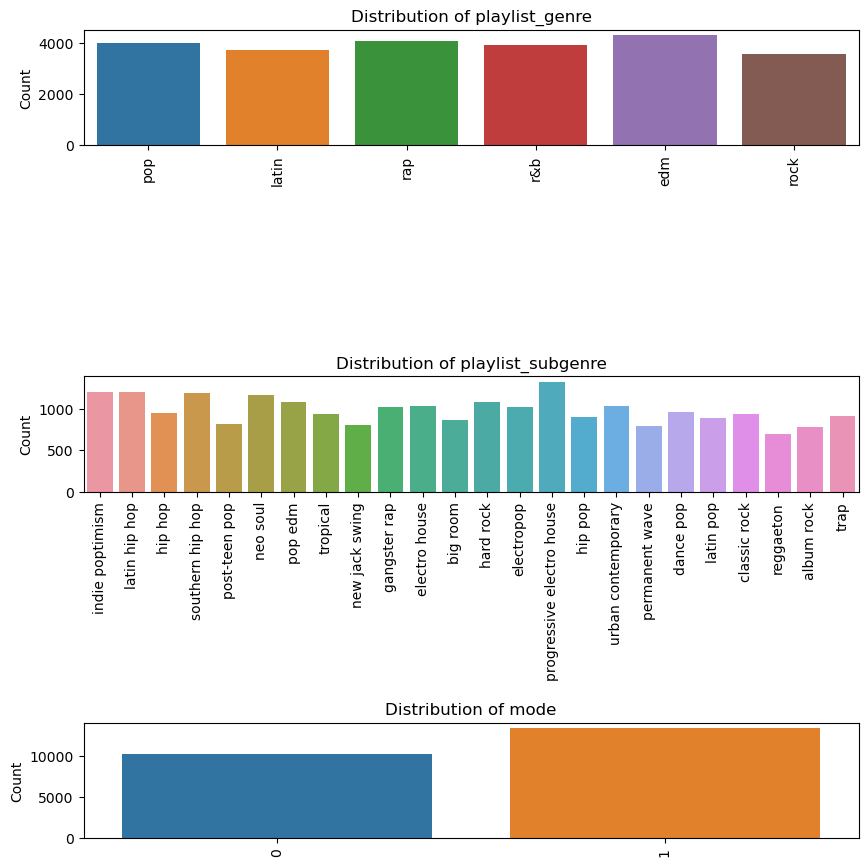

In [18]:
# Définir la taille de la figure
fig_height = (
    len(categorical_features) * 4
)  # Ajustez le multiplicateur selon vos besoins

# Plotting
fig, axes = plt.subplots(
    len(categorical_features),
    1,
    figsize=(10, fig_height),
    tight_layout=True,
    gridspec_kw={
        "hspace": 0.5
    },  # Ajuster l'espace vertical entre les sous-graphiques
)

# Ajuster la taille de chaque subplot
for ax in axes:
    box = ax.get_position()
    ax.set_position(
        [box.x0, box.y0, box.width, box.height * 0.5]
    )  # Ajuster le multiplicateur selon vos besoins

for i, cat in enumerate(categorical_features):
    sns.countplot(x=cat, data=X_train, ax=axes[i])
    axes[i].set_title(f"Distribution of {cat}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=90)

plt.show()

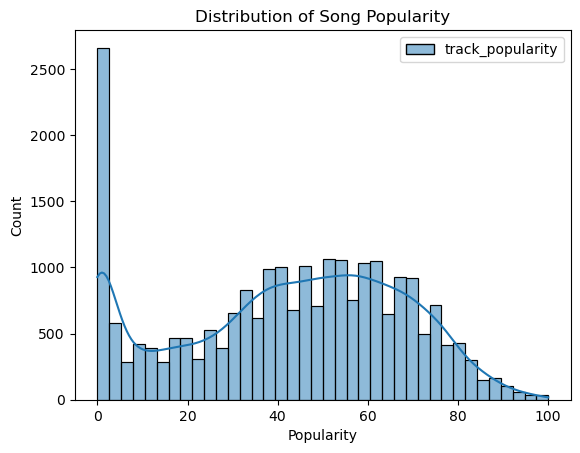

In [19]:
# Distribution of target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

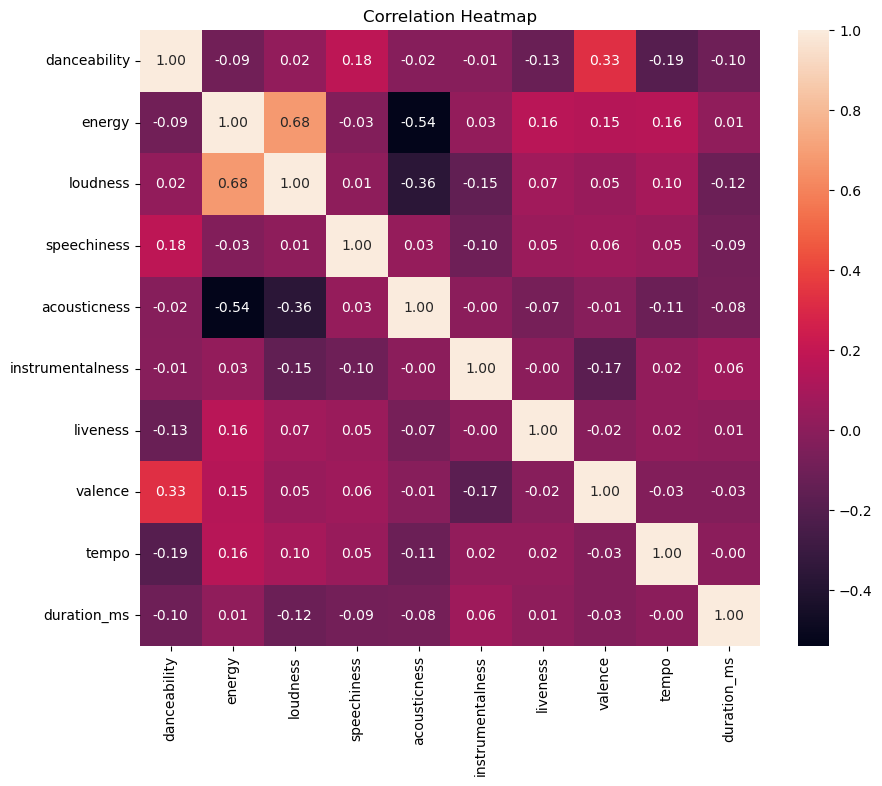

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    X_train[
        [
            "danceability",
            "energy",
            "loudness",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "duration_ms",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)
plt.title("Correlation Heatmap")
plt.show()

# Base Model

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [22]:
numeric_features = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

categorical_features = ["playlist_genre", "playlist_subgenre"]
features = numeric_features + categorical_features

In [23]:
X_train = X_train[features]

In [24]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

# Combine les transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Création de la pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])


In [25]:
pipeline.fit(X_train, y_train)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['playlist_genre',
                                                   'playlist_subgenre'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [26]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calcul de l'erreur RMSE sur l'ensemble d'entraînement
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE sur l'ensemble d'entraînement: {rmse_train}")

# Calcul de l'erreur RMSE sur l'ensemble de test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE sur l'ensemble de test: {rmse_test}")

RMSE sur l'ensemble d'entraînement: 8.24729798717982
RMSE sur l'ensemble de test: 21.125020908766633


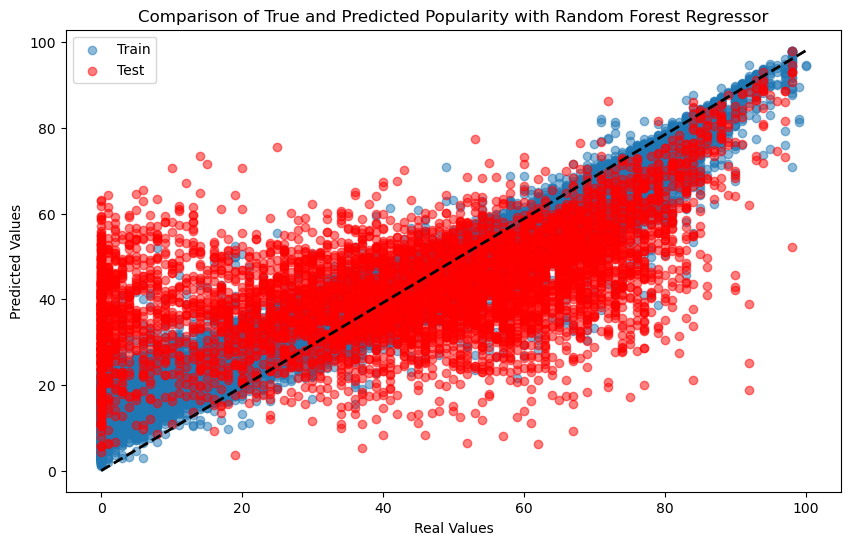

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label="Train")
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Test", color="r")
plt.title("Comparison of True and Predicted Popularity with Random Forest Regressor")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.plot(
    [y_train.min(), y_train.max()], [y_test.min(), y_test.max()], "k--", lw=2
)  
plt.legend()
plt.show()

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [hotjupiter](http://www.ramp.studio/events/hotjupiter_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/hotjupiter_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/hotjupiter_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/hotjupiter_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/hotjupiter_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/hotjupiter_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [28]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


class Regressor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.features = [
            "danceability",
            "energy",
            "key",
            "loudness",
            "mode",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "duration_ms",
            "playlist_genre",
            "playlist_subgenre",
        ]

        numeric_features = self.features[
            :-2
        ]  # Assuming the last two are categorical
        categorical_features = self.features[-2:]

        numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
        categorical_transformer = Pipeline(
            steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
            ]
        )

        self.model = Pipeline(
            steps=[
                ("preprocessor", preprocessor),
                (
                    "regressor",
                    RandomForestRegressor(n_estimators=100, random_state=42),
                ),
            ]
        )

    def _convert_array_to_df(self, X):
        """Converts a numpy array to a pandas DataFrame with the correct column names."""
        return pd.DataFrame(X, columns=self.features)

    def fit(self, X, y):
        X_df = self._convert_array_to_df(X)
        self.model.fit(X_df, y)

    def predict(self, X):
        X_df = self._convert_array_to_df(X)
        return self.model.predict(X_df)


You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [66]:
!ramp-test --submission starting_kit

Testing Spotify Popularity Prediction
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/rampwf/score_types/mare.py:15: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
	score   rmse  mare       time
	train   8.23   inf  26.108286
	valid  21.72   inf   0.524588
	test   21.32   inf   0.149517
CV fold 1
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/rampwf/score_types/mare.py:15: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
	score   rmse  mare       time
	train   8.23   inf  26.112372
	valid  21.73   inf   0.543580
	test   21.22   inf   0.153153
----------------------------
Mean CV scores
----------------------------
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid val